# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Functions for plot customizations

In [3]:
# Function for setting style and size of plot
def set_size_style(width, height, style=None):
    plt.figure(figsize=(width, height))
    if style != None:
        sns.set_style(style)

# Function for customizating the plot
def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

# Reading Data

In [4]:
df = pd.read_csv('smartphones.csv')

In [5]:
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


# Data Cleaning & Preparation

In [6]:
df.shape

(980, 22)

- There are 980 rows and 26 columns in dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

### Dealing null values

In [8]:
df.isna().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

<Axes: >

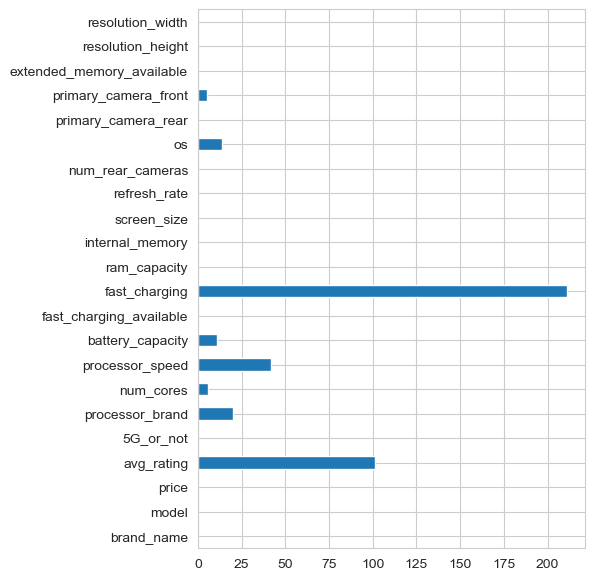

In [9]:
set_size_style(5,7,'whitegrid')
df.isna().sum().plot(kind='barh')

In [10]:
percentage_null_values = round(df.isna().sum()/df.shape[0] * 100,2)
percentage_null_values

brand_name                    0.00
model                         0.00
price                         0.00
avg_rating                   10.31
5G_or_not                     0.00
processor_brand               2.04
num_cores                     0.61
processor_speed               4.29
battery_capacity              1.12
fast_charging_available       0.00
fast_charging                21.53
ram_capacity                  0.00
internal_memory               0.00
screen_size                   0.00
refresh_rate                  0.00
num_rear_cameras              0.00
os                            1.43
primary_camera_rear           0.00
primary_camera_front          0.51
extended_memory_available     0.00
resolution_height             0.00
resolution_width              0.00
dtype: float64

- Dropping 'extended_upto' and 'fast_charging' columns

In [11]:
df = df.drop(columns = ['fast_charging'])
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [12]:
missing_values_rating = df[df['avg_rating'].isnull()].groupby('brand_name').agg({'brand_name':'count'}).rename(columns ={'brand_name':'missing_rating_values'})
missing_values_rating

,missing_rating_values
brand_name,
apple,2
asus,1
cat,1
duoqin,1
gionee,2
google,2
honor,2
huawei,5
infinix,1


In [13]:
df['avg_rating'] = df.groupby('brand_name')['avg_rating'].transform(lambda x: x.fillna(x.mean()))

In [14]:
df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,978.000000,980.000000,974.000000,938.000000,969.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.799381,0.560204,7.772074,2.427217,4817.748194,0.854082,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.736480,0.496616,0.836845,0.464090,1009.540054,0.353205,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,7.900000,1.000000,8.000000,2.300000,5000.000000,1.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [15]:
df.describe(include = "object")

,brand_name,model,processor_brand,os
count,980,980,960,966
unique,46,980,13,3
top,xiaomi,Apple iPhone 11,snapdragon,android
freq,134,1,413,909


In [16]:
for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('-'*50)
    

Column Name:  brand_name
['apple' 'asus' 'blackview' 'blu' 'cat' 'cola' 'doogee' 'duoqin' 'gionee'
 'google' 'honor' 'huawei' 'ikall' 'infinix' 'iqoo' 'itel' 'jio' 'lava'
 'leeco' 'leitz' 'lenovo' 'letv' 'lg' 'lyf' 'micromax' 'motorola' 'nokia'
 'nothing' 'nubia' 'oneplus' 'oppo' 'oukitel' 'poco' 'realme' 'redmi'
 'royole' 'samsung' 'sharp' 'sony' 'tcl' 'tecno' 'tesla' 'vertu' 'vivo'
 'xiaomi' 'zte']
--------------------------------------------------
Column Name:  model
['Apple iPhone 11' 'Apple iPhone 11 (128GB)' 'Apple iPhone 11 Pro Max'
 'Apple iPhone 12' 'Apple iPhone 12 (128GB)' 'Apple iPhone 12 (256GB)'
 'Apple iPhone 12 Mini' 'Apple iPhone 12 Mini (128GB)'
 'Apple iPhone 12 Mini (256GB)' 'Apple iPhone 12 Pro (256GB)'
 'Apple iPhone 12 Pro (512GB)' 'Apple iPhone 13' 'Apple iPhone 13 (256GB)'
 'Apple iPhone 13 (512GB)' 'Apple iPhone 13 Mini' 'Apple iPhone 13 Pro'
 'Apple iPhone 13 Pro (1TB)' 'Apple iPhone 13 Pro (256GB)'
 'Apple iPhone 13 Pro Max' 'Apple iPhone 13 Pro Max (1TB)'
 

In [17]:
df['fast_charging_available'].replace({1: 'Yes', 0: 'No'}, inplace= True)

In [18]:
df['extended_memory_available'].replace({1: 'Yes', 0: 'No'}, inplace= True)

In [19]:
df['5G_or_not'].replace({1: 'Yes', 0: 'No'}, inplace= True)

### Checking Duplicates

In [20]:
df.duplicated().sum()

0

- The dataset is free from duplicate values

# Insights From Data

- Now that the data has been cleaned and prepared, free from any unusual values, and it's ready for analysis. We can start exploring the data to uncover important insights that will help answer our questions

##### Q1. Which smartphone brands are regarded as the most popular?

In [23]:
mobile_brands = df.groupby('brand_name').agg({'brand_name':'count','avg_rating' : 'mean'}).rename(columns={'brand_name': 'brand_count'}).sort_values(by = 'brand_count', ascending =False)
mobile_brands

,brand_count,avg_rating
brand_name,,
xiaomi,134,7.877600
samsung,132,7.872414
vivo,111,7.715625
realme,97,7.644565
oppo,88,7.873171
motorola,52,8.010417
apple,46,7.679545
oneplus,42,8.223684
poco,41,7.870000


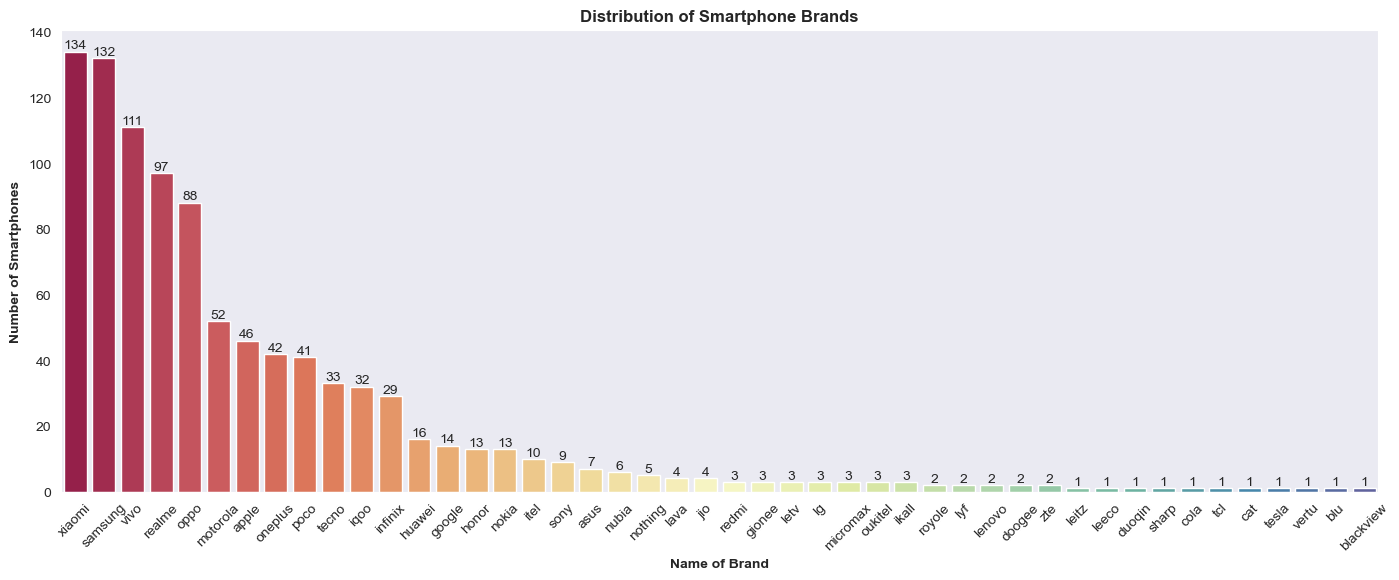

In [356]:
set_size_style(17,6,'dark')
ax = sns.barplot(data = mobile_brands, x = mobile_brands.index, y= 'brand_count',palette = 'Spectral')
plt.xticks(rotation=45)
customize_plot(ax,'Distribution of Smartphone Brands','Name of Brand', 'Number of Smartphones',12,10)
for c in ax.containers:
        ax.bar_label(c)

- Xiaomi and Samsung are the most popular brands

##### Q2. Which brands among the top 10 receive high ratings?

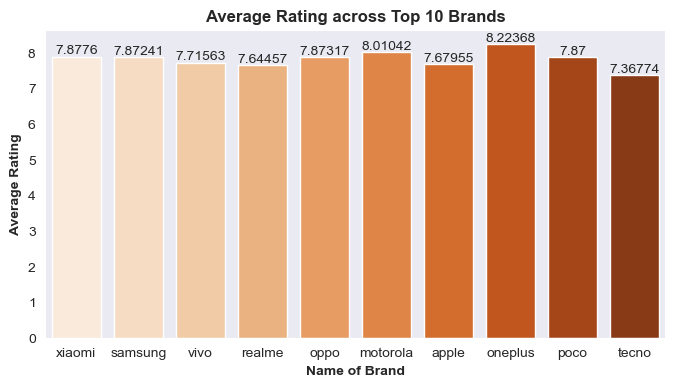

In [357]:
top10_brands = mobile_brands.head(10)
set_size_style(8,4, 'dark')
ax = sns.barplot(data= top10_brands,x = top10_brands.index, y= 'avg_rating', palette = 'Oranges')
customize_plot(ax,'Average Rating across Top 10 Brands', 'Name of Brand','Average Rating',12,10)

for c in ax.containers:
        ax.bar_label(c)

- Oneplus and Motorola receive high ratings among the top 10 brands.

##### Q3. Which brand offer expensive smartphones, and is there any correlation between the ratings and prices of smartphones?

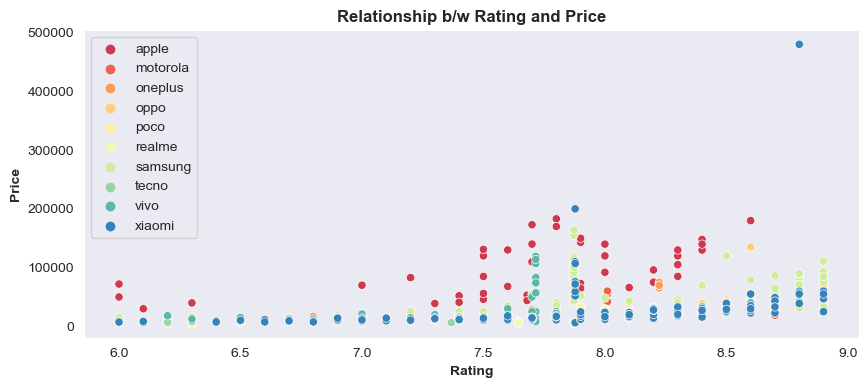

In [358]:
selected_brands = df[df['brand_name'].isin(['oneplus', 'motorola', 'oppo','xiaomi', 'samsung', 'vivo', 'realme', 'apple', 'poco', 'tecno'])]
set_size_style(10,4,'dark')
ax = sns.scatterplot(x=selected_brands['avg_rating'], y=selected_brands['price'], hue=selected_brands['brand_name'],palette = 'Spectral')
customize_plot(ax,'Relationship b/w Rating and Price', 'Rating','Price',12,10)
plt.legend(loc='upper left')


- Apple typically provides expensive smartphones.
- High-priced smartphones tend to receive high ratings.

##### Q4. Among the various smartphone brands available in the market, which brand is known to offer the highest number of 5G smartphones?

In [27]:
smartphones_5G = selected_brands[selected_brands['5G_or_not'] == 'Yes']
smartphones_5G['brand_name'].value_counts()

xiaomi      76
samsung     69
oppo        53
vivo        53
realme      51
apple       37
oneplus     36
motorola    32
poco        26
tecno        5
Name: brand_name, dtype: int64

(-1.1109869140787758,
 1.1109870126715722,
 -1.1121605931669025,
 1.1454394356528141)

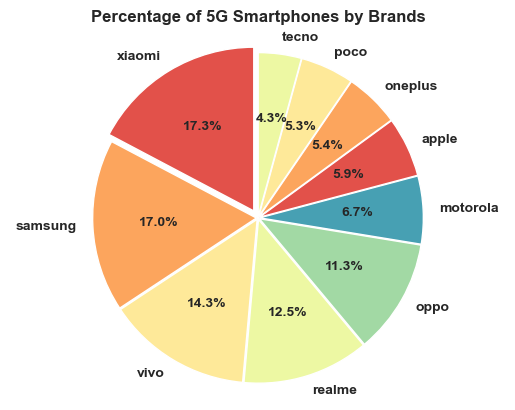

In [349]:
brand_counts = selected_brands['brand_name'].value_counts()
sizes = brand_counts.values
labels = brand_counts.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = [0.05,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],textprops={'fontsize': 10, 'fontweight': 'bold'}, colors = sns.color_palette('Spectral'))
plt.title('Percentage of 5G Smartphones by Brands', fontweight = 'bold')
plt.axis('equal')



- Xiaomi and Samsung exhibit a larger portion of 5G smartphones compared to other brands.

##### Q5. What is the correlation between smartphone chipset brand and both price and user ratings?

In [34]:
df['processor_brand'].value_counts()

snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: processor_brand, dtype: int64

In [47]:
processor_brands= df.groupby('processor_brand').agg({'processor_brand':'count','price':'mean','avg_rating':'mean'}).rename(columns = {'processor_brand': 'processor_count'}).sort_values(by = 'processor_count', ascending = False).head(7)
processor_brands

,processor_count,price,avg_rating
processor_brand,,,
snapdragon,413,39763.104116,8.110337
helio,201,12458.587065,7.271144
dimensity,177,26163.666667,8.114213
exynos,50,37841.520000,8.023793
bionic,45,96921.555556,7.679545
unisoc,26,8115.153846,6.634290
tiger,24,9095.333333,6.731024


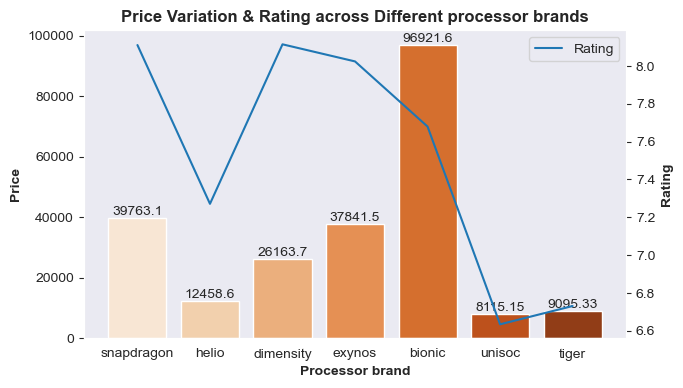

In [359]:
set_size_style(7,4,'dark')
ax1 = sns.barplot(data = processor_brands, x = processor_brands.index, y = 'price',palette = 'Oranges')
ax2=ax1.twinx()
ax2 = sns.lineplot(data = processor_brands, x = processor_brands.index, y = 'avg_rating')
customize_plot(ax1,'Price Variation & Rating across Different processor brands', 'Processor brand','Price',12,10)
ax2.set_ylabel('Rating', fontweight = 'bold')
plt.legend(['Rating'])
for c in ax1.containers:
        ax1.bar_label(c)

- iPhones, which utilize the Bionic chipset, are among the most expensive smartphones in the market.
- In contrast, cheaper smartphones often incorporate the Unisoc or Helio chipset.
- Smartphones featuring Snapdragon chipsets tend to receive higher ratings due to their performance and reliability.
- Conversely, smartphones equipped with Unisoc chipsets consistently receive the lowest average ratings compared to other chipset options available.

In [206]:
helio_smartphones = selected_brands[selected_brands['processor_brand'] == 'helio']

(-1.099996468449537,
 1.0999995474189628,
 -1.099999834413621,
 1.0999999921149344)

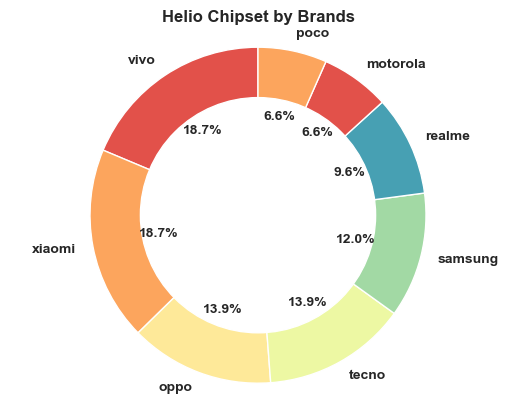

In [344]:
brand_counts = helio_smartphones['brand_name'].value_counts()
sizes = brand_counts.values
labels = brand_counts.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 10, 'fontweight': 'bold'}, colors = sns.color_palette('Spectral'))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Helio Chipset by Brands', fontweight = 'bold')
plt.axis('equal')

- Vivo and Xiaomi are prominent brands that provide their users with smartphones equipped with Helio chipsets.

##### Q6. Is there a relationship between RAM capacity and user ratings?

<Figure size 800x400 with 0 Axes>

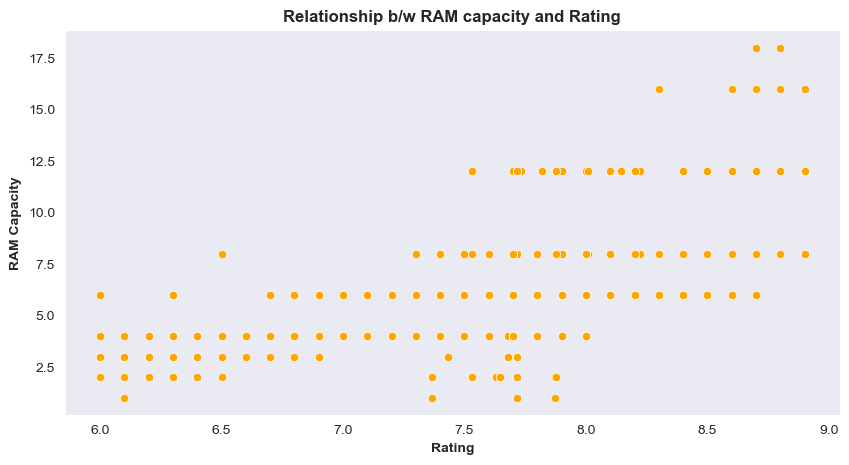

In [360]:
set_size_style(8,4,'dark')
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(y=df['ram_capacity'], x=df['avg_rating'], color = 'orange')
customize_plot(ax,'Relationship b/w RAM capacity and Rating', 'Rating','RAM Capacity',12,10)

- As the amount of RAM in smartphones increases, there is a corresponding rise in their ratings, suggesting a positive correlation between RAM capacity and overall satisfaction with the device

##### Q7. What is the distribution of smartphones based on the count of rear cameras they possess?

In [70]:
num_camera = df['num_rear_cameras'].value_counts()
num_camera

3    551
2    208
4    156
1     65
Name: num_rear_cameras, dtype: int64

(-1.130898539510837,
 1.1014673133916006,
 -1.106120519655753,
 1.1002914533169361)

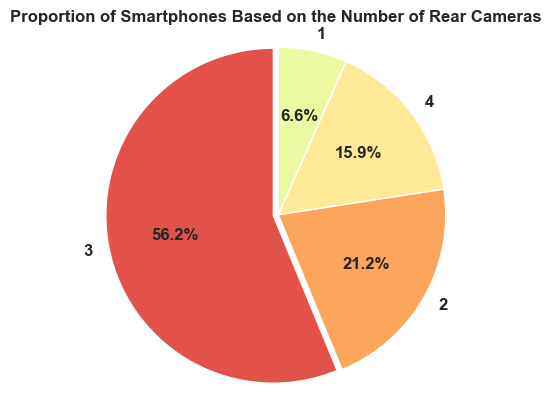

In [295]:
sizes = num_camera.values
labels = num_camera.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle = 90, explode = [0.03,0,0,0],textprops={'fontsize': 12, 'fontweight': 'bold'}, colors = sns.color_palette('Spectral'))
plt.title('Proportion of Smartphones Based on the Number of Rear Cameras', fontweight = 'bold')
plt.axis('equal')


- The majority of smartphones are equipped with triple rear cameras.

##### Q8. How does the number of rear and front cameras affect the price and rating of mobile phones?

In [82]:
camera_smartphones = df.groupby('num_rear_cameras').agg({'price' : 'mean'}).sort_values(by = 'price', ascending = False)
camera_smartphones

,price
num_rear_cameras,
3,36388.961887
4,35537.801282
2,23342.490385
1,21856.015385


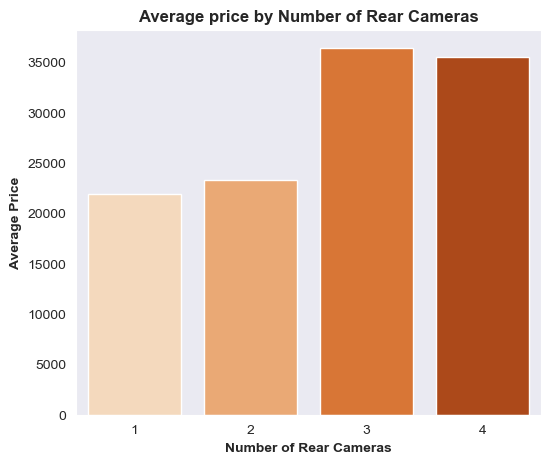

In [362]:
set_size_style(6,5,'dark')
ax = sns.barplot(data = camera_smartphones, x = camera_smartphones.index, y = 'price', palette = 'Oranges')
customize_plot(ax,'Average price by Number of Rear Cameras', 'Number of Rear Cameras','Average Price',12,10)
for c in ax1.containers:
        ax1.bar_label(c)

- Smartphones equipped with quad and triple rear cameras tend to be more expensive.

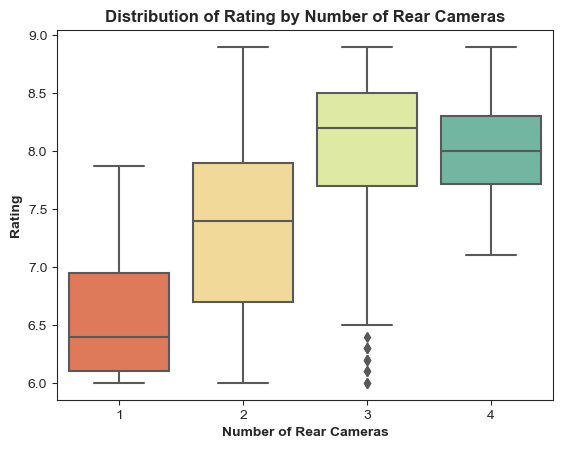

In [302]:
ax = sns.boxplot(x = df['num_rear_cameras'], y = df['avg_rating'], palette = 'Spectral')
customize_plot(ax,'Distribution of Rating by Number of Rear Cameras', 'Number of Rear Cameras','Rating',12,10)

- Users tend to prefer smartphones with multiple cameras, as devices equipped with only a single camera often receive lower ratings.

##### Q9. Is there a relationship between the resolution of primary cameras and both pricing and user satisfaction?

Text(0.5, 1.0, 'Correlation Heatmap')

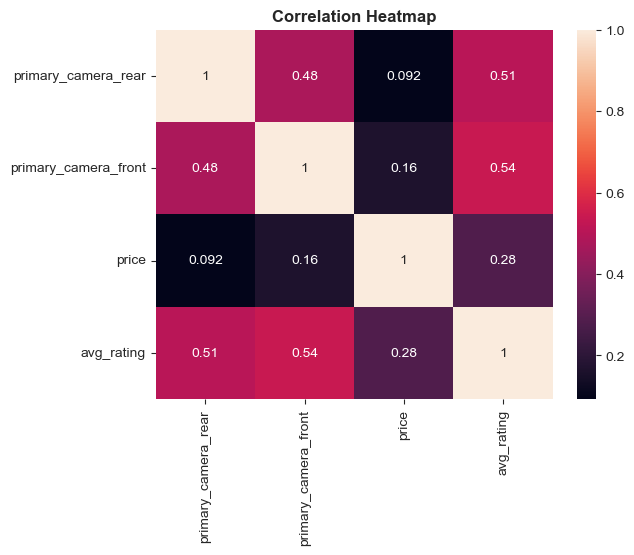

In [317]:
sns.heatmap(df[['primary_camera_rear','primary_camera_front','price','avg_rating']].corr(), annot = True)
plt.title('Correlation Heatmap', fontweight = 'bold')

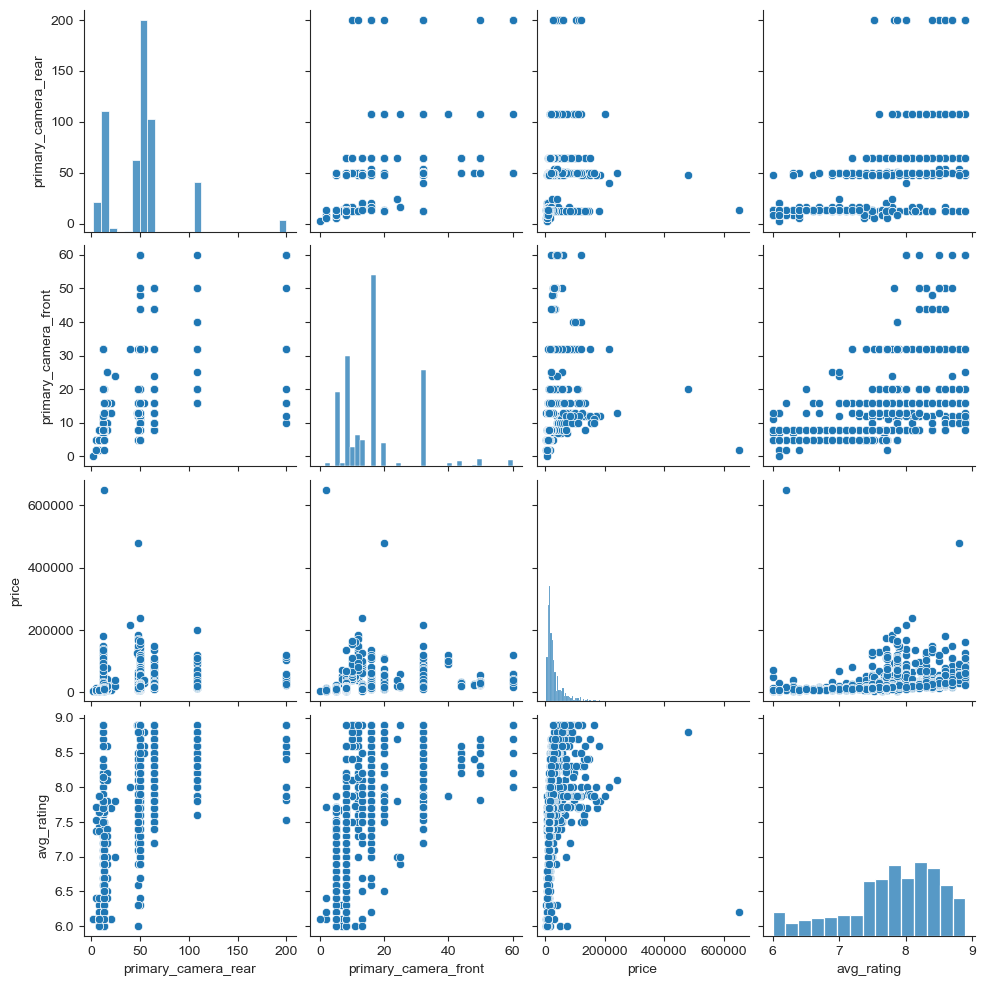

In [322]:
sns.pairplot(df[['primary_camera_rear','primary_camera_front','price','avg_rating']])

- Smartphones with higher megapixel primary cameras tend to receive higher average ratings from users.
- Smartphones with better rear cameras might cost a bit more, there are many other things besides camera quality that affect the price.

##### Q10. What is the distribution of screen sizes and refresh rates among mobile phones?

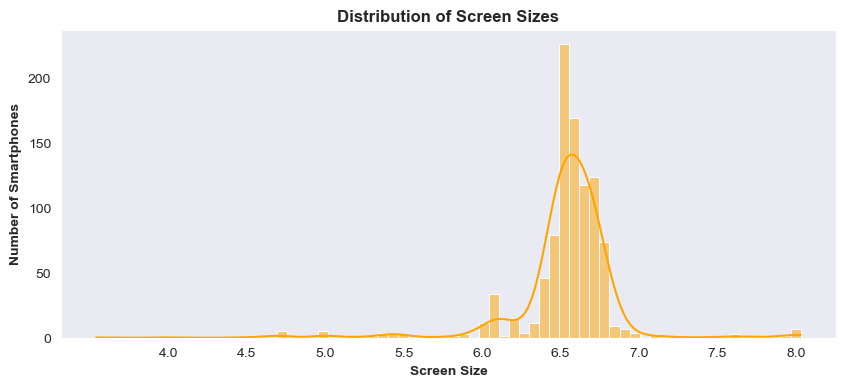

In [363]:
set_size_style(10,4,'dark')
ax = sns.histplot(df['screen_size'], bins =70, kde = True,color = 'orange')
customize_plot(ax,'Distribution of Screen Sizes', 'Screen Size','Number of Smartphones',12,10)
ax.set_xticks([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8])

- The majority of smartphones typically feature a screen size of around 6.5 inches.
- However, there are smartphones available with an 8-inch screen.

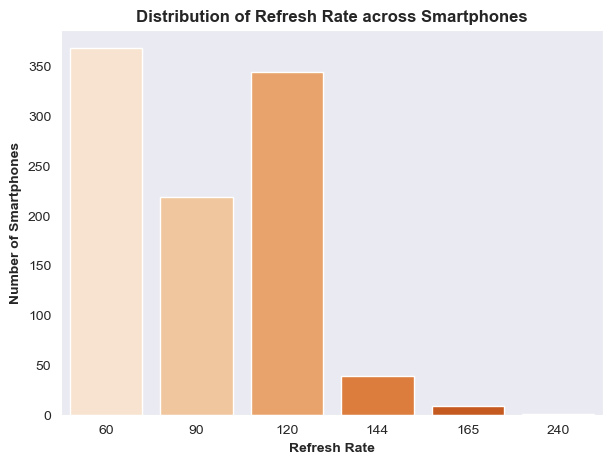

In [365]:
set_size_style(7,5,'dark')
ax = sns.countplot(data = df, x = df['refresh_rate'], palette = 'Oranges')
customize_plot(ax,'Distribution of Refresh Rate across Smartphones', 'Refresh Rate','Number of Smartphones',12,10)

- The majority of mobile phones offer support for refresh rates of 60Hz and 120Hz.

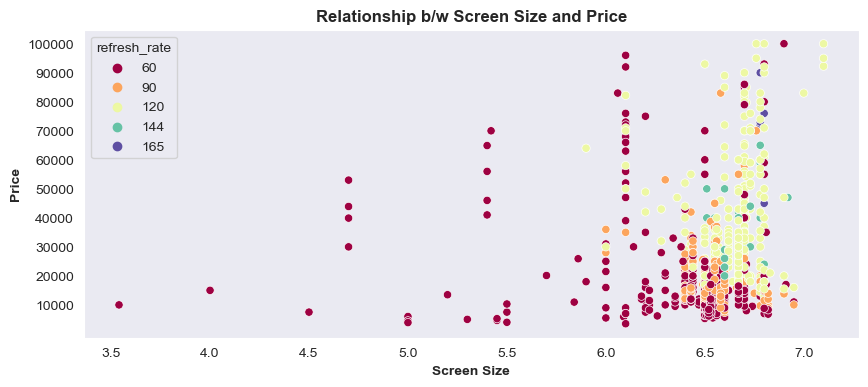

In [366]:
new_df = df[df['price'] < 100000]
set_size_style(10,4,'dark')
ax = sns.scatterplot (x =new_df['screen_size'], y =new_df['price'], hue = new_df['refresh_rate'], palette = 'Spectral')
customize_plot(ax,'Relationship b/w Screen Size and Price', 'Screen Size','Price',12,10)
ax.set_yticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000,100000])

- In the midrange segment, the majority of smartphones typically feature screen sizes ranging from 6 to 7 inches, with a refresh rate of either 60 or 90Hz.
- Moving into the upper midrange segment, smartphones commonly offer a refresh rate of 120Hz.

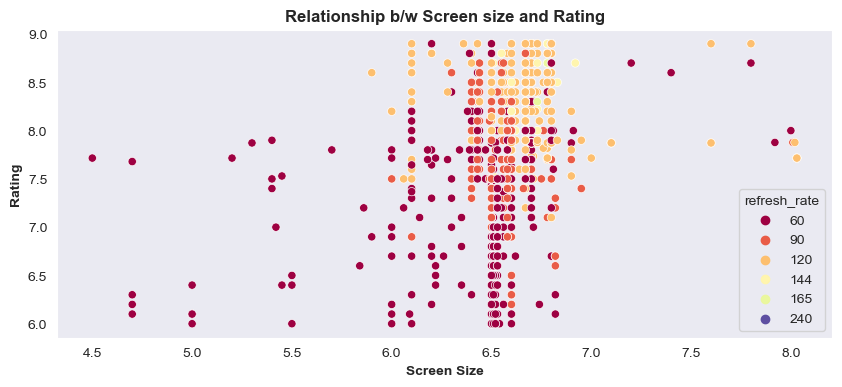

In [367]:
set_size_style(10,4,'dark')
ax=sns.scatterplot(data = df, x = 'screen_size', y ='avg_rating', hue = 'refresh_rate', palette = 'Spectral')
customize_plot(ax,'Relationship b/w Screen size and Rating', 'Screen Size','Rating',12,10)

- There appears to be no correlation between the screen size of smartphones and their ratings.
- Users tend to favor smartphones with display refresh rates of 90Hz or higher, with a preference for 120Hz or greater.

##### Q11. Do smartphones that support fast charging tend to receive higher ratings?

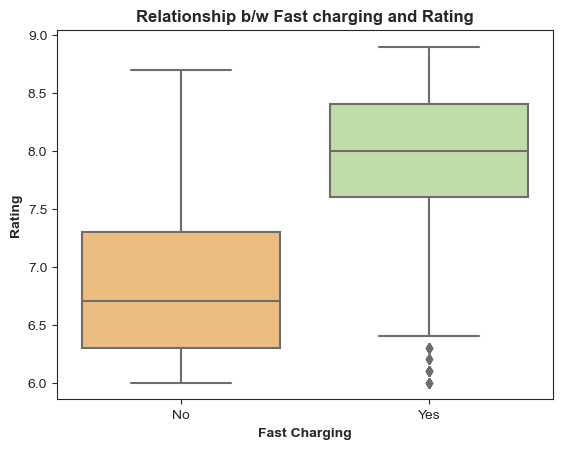

In [323]:
ax=sns.boxplot(data=df, x= 'fast_charging_available', y='avg_rating', palette = 'Spectral')
customize_plot(ax,'Relationship b/w Fast charging and Rating', 'Fast Charging','Rating',12,10)

- Smartphones equipped with fast charging technology typically receive high ratings.

# Key Findings

- Xiaomi and Samsung emerge as the most popular smartphone brands, with Oneplus and Motorola receiving high ratings among the top 10 brands.
- Apple tends to provide expensive smartphones, while smartphones with Snapdragon chipsets receive higher ratings due to their performance and reliability.
- iPhones, featuring the Bionic chipset, are among the most expensive smartphones, while cheaper smartphones often incorporate Unisoc or Helio chipsets.
- Vivo and Xiaomi are notable brands offering smartphones equipped with Helio chipsets.
- There's a positive correlation between RAM capacity and user ratings, suggesting that higher RAM capacity leads to increased overall satisfaction with the device.
- Smartphones with quad and triple rear cameras tend to be more expensive, with users preferring multiple cameras for better functionality and receiving higher ratings.
- Higher megapixel primary cameras in smartphones correlate with higher average ratings from users.
- While most smartphones have a screen size of around 6.5 inches, there are options with larger 8-inch screens, and user preference leans toward refresh rates of 90Hz or higher.
- Fast charging technology in smartphones is associated with higher ratings, indicating user satisfaction with this feature.